# EEG Cognitive State Classification with Deep Learning

This project implements and evaluates deep learning models (EEGNet and TSCeption) for classifying cognitive states from EEG data sourced from the Mental Arithmetic Tasks Dataset. The analysis includes power spectral density (PSD) comparison and binary classification using advanced techniques, aiming to contribute insights into EEG-based cognitive state assessment.


## Content:

1. Introduction (Theory/ Goal/ Approach)
2. Load and Preprocessing the data


### 1. Introduction


**Electroencephalography (EEG)** is a technique used to record electrical activity in the brain. It's a non-invasive method that involves placing electrodes on the scalp to detect and measure the electrical signals generated by neurons firing within the brain.<br>
**Power Spectral Density(PSD)** analysis involves examining the distribution of signal power across specific frequency bands in EEG data. By comparing these distributions between rest and task states, insights into distinct brain activity patterns emerge, crucial for accurate cognitive state classification.

- **EEG Works**:

  - Electrodes Placement: Small metal discs (electrodes) are placed on the scalp in a specific pattern (montage) and connected to the EEG machine.

  - Signal Detection: Electrodes detect weak electrical signals generated by neuron activity in the brain (0.5 to 100 microvolts).

  - Amplification and Recording: EEG machine amplifies and records these signals continuously or in segments for analysis.

  - Data Analysis: Analyzing recorded EEG data reveals frequency components (delta, theta, alpha, beta, gamma waves) and their scalp distribution, aiding study of brain function and cognition.<br><br>

- **PSD**:

  - **Frequency Band Analysis**: PSD analysis involves calculating the distribution of signal power across different frequency bands—Delta (1-4 Hz), Theta (4-8 Hz), Alpha (8-12 Hz), Beta (12-30 Hz), and Gamma (30-100 Hz). This analysis helps in understanding how brain activity varies between resting and task-engaged states, providing insights into cognitive processes.

  - **Comparative Analysis**: By comparing the PSDs of EEG signals recorded during rest and mental arithmetic tasks, you can identify frequency band differences. These differences may indicate distinct patterns of brain activity associated with different cognitive states, facilitating the development of effective classification models.<br><br>

- **Goal**: <br>The aim of this study is to utilize deep learning models like EEGNet and TSCeption for classifying cognitive states from EEG data obtained from the Mental Arithmetic Tasks Dataset. By implementing these models, the we seek to accurately differentiate between rest and task states based on EEG signals. <br><br>
- **Approach**:
  - Load and preprocess the data
  - Perform Power Spectral Density(PSD) Analysis
  - Feature Extraction
  - Model Implementation
  - Performance Evaluation<br><br>
- **Dataset Overview**: <br>
  The dataset features EEG recordings from 36 healthy volunteers performing serial subtraction tasks. Recorded using a Neurocom EEG 23-channel system, electrodes were placed on the scalp per the International 10/20 scheme, referenced to interconnected ear electrodes. Data includes both rest states and task periods, with preprocessing involving 60-second artifact-free segments and Independent Component Analysis (ICA) for artifact removal. Participants completed trials involving 4-digit minuends and 2-digit subtrahends, categorized based on task accuracy and completion rates. The dataset follows the Brain Imaging Data Structure (BIDS), ensuring standardized analysis and sharing in neuroscience research.


### 2. Load and Preprocessing the data


1. The data is stored in edf format.
2. We will use mne library to operate on the data.
3. Procedure
   - Import relevant Libraries
   - Get key insights
   - Load Data


##### Import relevant libraries


In [1]:
import mne
import numpy as np

import os

import matplotlib.pyplot as plt

##### Get key insights


In [ ]:
raw = mne.io.read_raw_edf(
    '.\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf', preload=True)
# preload = True, will load the data from edf file into memory immediately upon reading

# All recordings are artifact-free EEG segments so processing is done so no Independent Component Analysis (ICA) to be used

Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


In [ ]:
raw.get_data().shape

(21, 31000)

Sampling frequency: 500.0 Hz
Highpass filter: 0.5 Hz
Lowpass filter: 45.0 Hz
Number of channels: 21
Channel names: ['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG C3', 'EEG C4', 'EEG T5', 'EEG T6', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG A2-A1', 'ECG ECG']
Data duration: 62.0 seconds


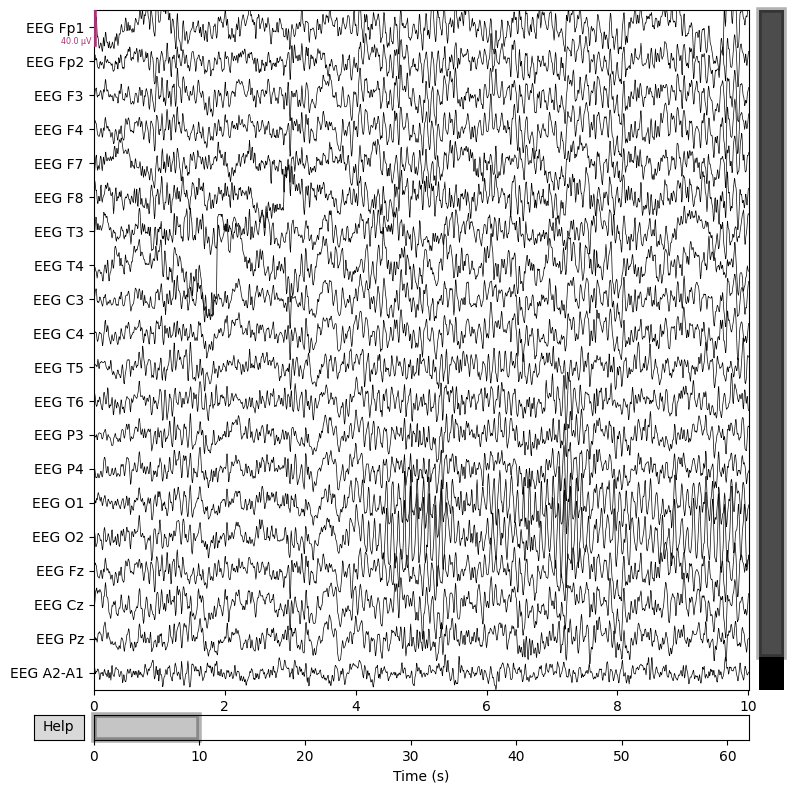

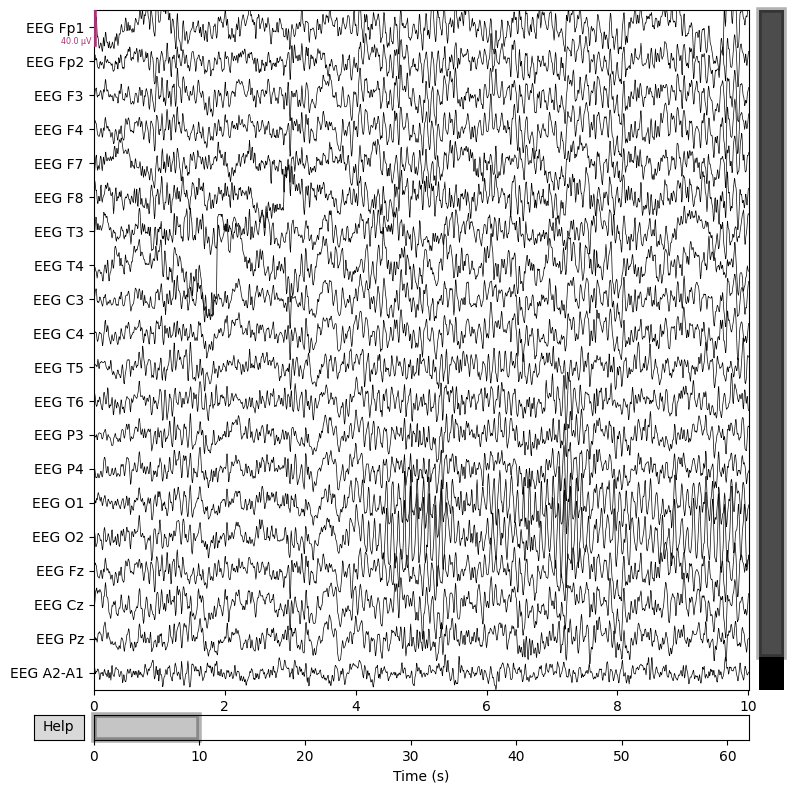

In [ ]:
s_freq = raw.info['sfreq']
highpass = raw.info['highpass']
lowpass = raw.info['lowpass']
n_channels = len(raw.info['ch_names'])
channel_names = raw.info['ch_names']

# Print basic information
print("Sampling frequency:", raw.info['sfreq'], "Hz")
print("Highpass filter:", raw.info['highpass'], "Hz")
print("Lowpass filter:", raw.info['lowpass'], "Hz")

# Additional key insights
print("Number of channels:", len(raw.info['ch_names']))
print("Channel names:", raw.info['ch_names'])
print("Data duration:", raw.n_times / raw.info['sfreq'], "seconds")

# Example of plotting EEG data
raw.plot()

##### PSD on file 1


In [55]:
from scipy import signal

In [56]:
raw.get_data().shape

(21, 31000)

In [57]:
rest_filepaths = []
task_filepaths = []

directory = './eeg-during-mental-arithmetic-tasks-1.0.0/'
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if filename.endswith('.edf'):
        label = filename.split('_')[-1].split('.')[0]
        if label == '1':
            rest_filepaths.append(filepath)
        else:
            task_filepaths.append(filepath)

In [58]:
len(rest_filepaths)

36

In [59]:
def get_avg_PSD_for_a_candidate(filepath):
    raw = mne.io.read_raw_edf(filepath, preload=True)
    data = raw.get_data()

    F = []
    PSD = []

    for i in range(raw.get_data().shape[0]):
        data_channel = data[i]
        channel_array = np.array(data_channel, dtype=float)
        length = len(channel_array)
        fs = 500

        freq, psd = signal.welch(channel_array, fs, nperseg=2048)
        F.append(freq)
        PSD.append(psd)

    avg_freq = np.mean(F, axis=0)
    avg_psd = np.mean(PSD, axis=0)

    return avg_freq, avg_psd

In [60]:
rest_F, rest_PSD = [], []


for filename in rest_filepaths:
    F, PSD = get_avg_PSD_for_a_candidate(filename)
    rest_F.append(F)
    rest_PSD.append(PSD)

Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject02_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject03_1.edf...
EDF file detected
Setting channel info structure...

In [61]:
task_F, task_PSD = [], []

for filename in task_filepaths:
    F, PSD = get_avg_PSD_for_a_candidate(filename)
    task_F.append(F)
    task_PSD.append(PSD)

Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject02_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject03_2.edf...
EDF file detected
Setting channel info structure...

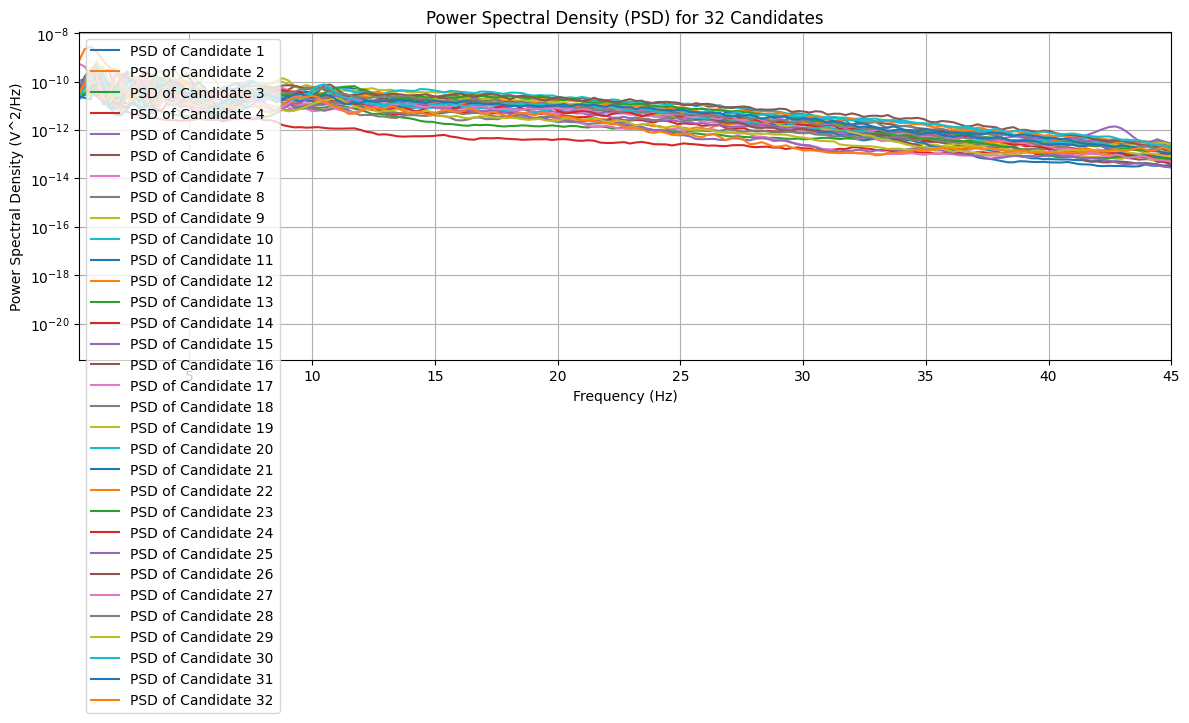

In [62]:
plt.figure(figsize=(12, 6))
for i in range(32):  # Assuming you have 32 channels
    plt.semilogy(rest_F[i], rest_PSD[i], label=f'PSD of Candidate {i+1}')

plt.xlabel('Frequency (Hz)')
plt.xlim([0.5, 45])
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Power Spectral Density (PSD) for 32 Candidates')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

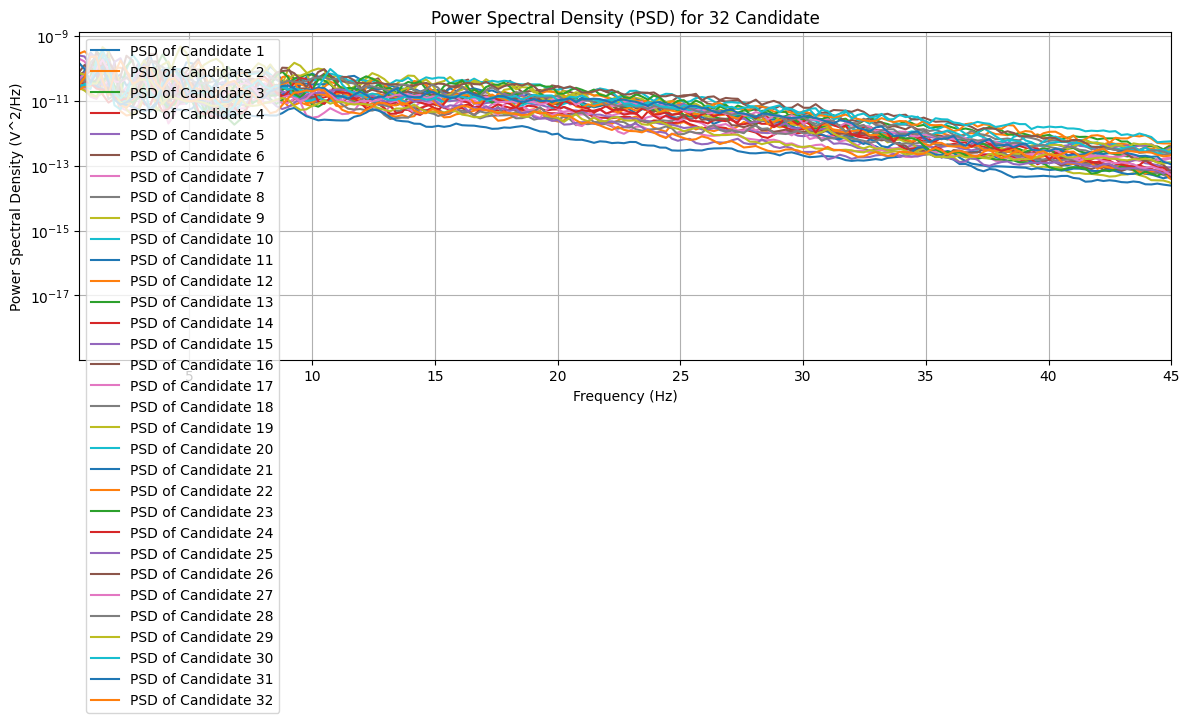

In [63]:
plt.figure(figsize=(12, 6))
for i in range(32):  # Assuming you have 32 channels
    plt.semilogy(task_F[i], task_PSD[i], label=f'PSD of Candidate {i+1}')

plt.xlabel('Frequency (Hz)')
plt.xlim([0.5, 45])
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Power Spectral Density (PSD) for 32 Candidate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

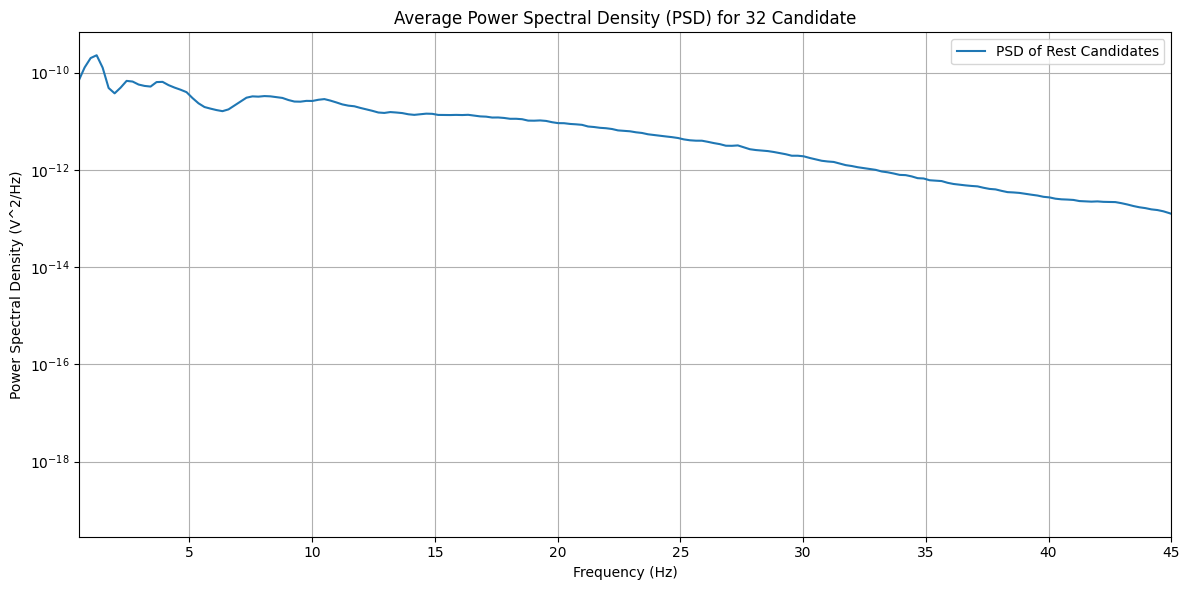

In [64]:
final_rest_F = np.mean(rest_F, axis=0)
final_rest_PSD = np.mean(rest_PSD, axis=0)

plt.figure(figsize=(12, 6))

plt.semilogy(final_rest_F, final_rest_PSD, label='PSD of Rest Candidates')

plt.xlabel('Frequency (Hz)')
plt.xlim([0.5, 45])
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Average Power Spectral Density (PSD) for 32 Candidate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

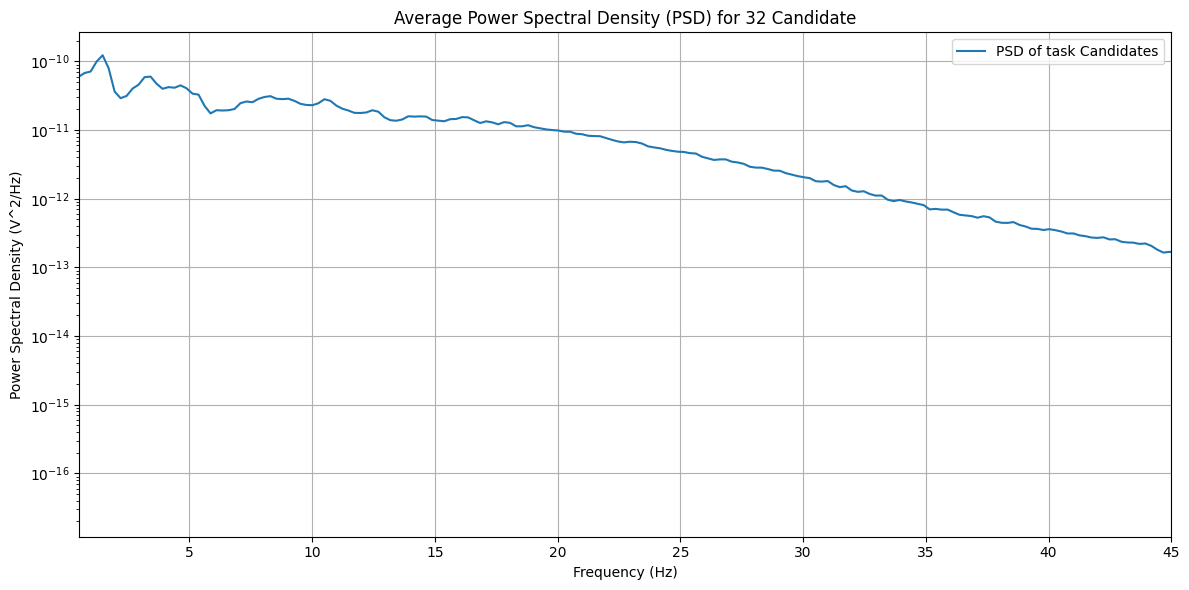

In [65]:
final_task_F = np.mean(task_F, axis=0)
final_task_PSD = np.mean(task_PSD, axis=0)

plt.figure(figsize=(12, 6))

plt.semilogy(final_task_F, final_task_PSD, label='PSD of task Candidates')

plt.xlabel('Frequency (Hz)')
plt.xlim([0.5, 45])
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Average Power Spectral Density (PSD) for 32 Candidate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

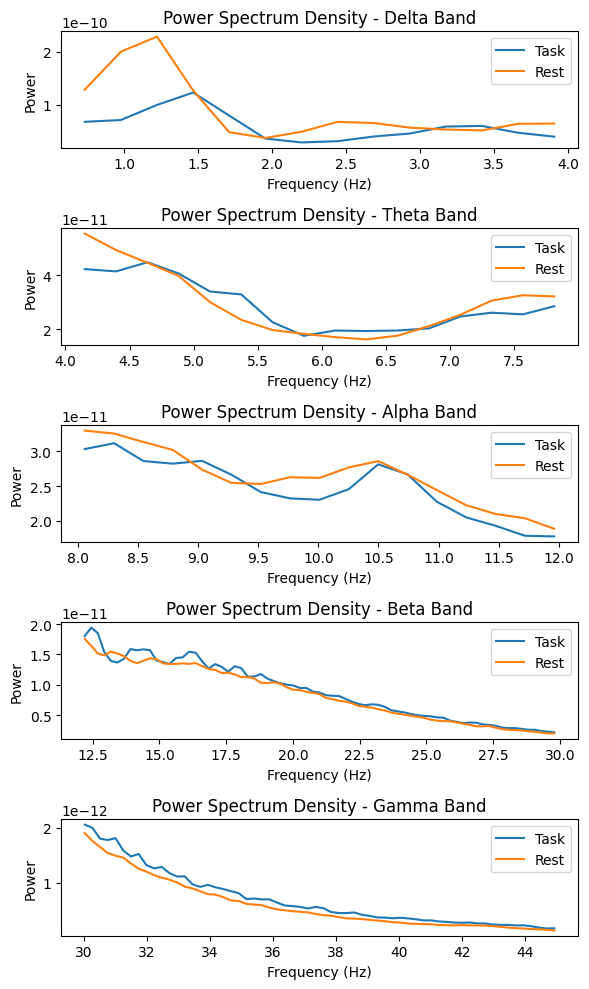

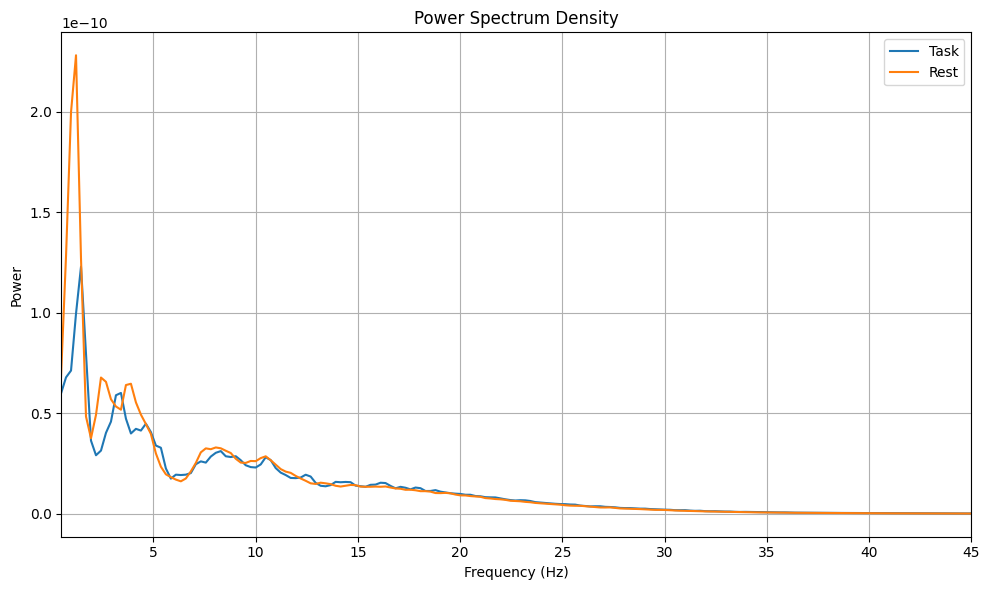

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have final data arrays like final_task_F, final_task_PSD, final_rest_F, final_rest_PSD

# Define frequency bands
freq_bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 45)
}

# Function to extract power in specified frequency bands


def extract_band_power(freqs, psd, bands):
    band_power = {}
    for band, (low, high) in bands.items():
        indices = np.where((freqs >= low) & (freqs < high))[0]
        band_power[band] = np.mean(psd[indices])
    return band_power


# Compute band powers for task and rest conditions
bands_power_task = extract_band_power(final_task_F, final_task_PSD, freq_bands)
bands_power_rest = extract_band_power(final_rest_F, final_rest_PSD, freq_bands)

# Plotting each band separately
plt.figure(figsize=(6, 10))

# Plot individual bands
for i, (band, (low, high)) in enumerate(freq_bands.items(), 1):
    plt.subplot(len(freq_bands), 1, i)

    # Task condition
    indices_task = np.where((final_task_F >= low) & (final_task_F < high))[0]
    plt.plot(final_task_F[indices_task],
             final_task_PSD[indices_task], label='Task')

    # Rest condition
    indices_rest = np.where((final_rest_F >= low) & (final_rest_F < high))[0]
    plt.plot(final_rest_F[indices_rest],
             final_rest_PSD[indices_rest], label='Rest')

    plt.title(f'Power Spectrum Density - {band} Band')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.legend()

plt.tight_layout()
plt.show()

# Plotting power vs frequency
plt.figure(figsize=(10, 6))

# Task condition
plt.plot(final_task_F, final_task_PSD, label='Task')
# Rest condition
plt.plot(final_rest_F, final_rest_PSD, label='Rest')
plt.xlim([0.5, 45])
plt.title('Power Spectrum Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
final_rest_F.shape, final_rest_PSD.shape, final_task_F.shape, final_task_PSD.shape

((1025,), (1025,), (1025,), (1025,))

In [68]:
len(rest_filepaths), len(task_filepaths)

(36, 36)

In [69]:
rest_data = []

for filepath in rest_filepaths:
    raw = mne.io.read_raw_edf(filepath, preload=True)

    rest_data.append(raw)

task_data = []
for filepath in task_filepaths:
    raw = mne.io.read_raw_edf(filepath, preload=True)
    task_data.append(raw)

Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject02_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from c:\Users\Atharva\Desktop\main_project_EEG\eeg-during-mental-arithmetic-tasks-1.0.0\Subject03_1.edf...
EDF file detected
Setting channel info structure...

In [70]:
task_data[0].get_data()

array([[ 4.47604913e-06,  1.20802117e-06, -2.54600773e-06, ...,
        -4.13607233e-10, -4.13607233e-10, -4.13607233e-10],
       [-2.74030294e-06, -3.30875398e-06, -3.70825978e-06, ...,
        -1.40245823e-09, -1.40245823e-09, -1.40245823e-09],
       [-2.50173872e-06, -4.41783471e-06, -6.41085425e-06, ...,
         2.52872511e-11,  2.52872511e-11,  2.52872511e-11],
       ...,
       [ 8.48305957e-07,  4.52614272e-07, -1.03927692e-07, ...,
        -9.83513695e-10, -9.83513695e-10, -9.83513695e-10],
       [ 9.30096361e-08, -2.64323612e-07, -4.21048721e-07, ...,
         2.28371710e-10,  2.28371710e-10,  2.28371710e-10],
       [-8.46279094e-06, -8.37301808e-06, -8.47401254e-06, ...,
         9.52217899e-09,  9.52217899e-09,  9.52217899e-09]])

In [71]:
rest_data[0].info

Measurement date,"January 01, 2011 00:00:00 GMT"
Experimenter,Unknown
Participant,0
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.50 Hz
Lowpass,45.00 Hz


In [72]:
rest_F = np.array(rest_F)
rest_PSD = np.array(rest_PSD)
task_F = np.array(task_F)
task_PSD = np.array(task_PSD)

In [73]:
from scipy.signal import welch
import scipy


# Define frequency bands of interest
delta_band = (0.5, 4)
theta_band = (4, 8)
alpha_band = (8, 12)
beta_band = (12, 30)
gamma_band = (30, 45)


def get_features(F, PSD):
    # Initialize arrays to store features
    features_total = []
    for i in range(len(rest_PSD)):
        freqs = F[i]
        psd = PSD[i]
        features = []

        # Loop over frequency bands
        for band in [delta_band, theta_band, alpha_band, beta_band, gamma_band]:
            band_indices = np.where((freqs >= band[0]) & (freqs <= band[1]))[0]
            band_psd = psd[band_indices]

            # Compute features from PSD
            mean_power = np.mean(band_psd)
            variance = np.var(band_psd)
            skewness = scipy.stats.skew(band_psd)
            kurtosis = scipy.stats.kurtosis(band_psd)
            peak_frequency = freqs[band_indices[np.argmax(band_psd)]]
            total_power = np.sum(band_psd)
            relative_power = mean_power / np.sum(psd)

            # Append features to array
            features.append([mean_power, variance, skewness, kurtosis,
                            peak_frequency, total_power, relative_power])
        features_total.append(features)
    return features_total


features_rest = np.array(get_features(rest_F, rest_PSD))
features_task = np.array(get_features(task_F, task_PSD))


# Use features in your EEGNet model input

In [74]:
features_rest.shape

(36, 5, 7)

In [75]:
features_task.shape

(36, 5, 7)

In [76]:
features_all = np.concatenate((features_rest, features_task), axis=0)

In [77]:
features_all.shape

(72, 5, 7)

In [78]:
features_all = features_all.reshape((72, 5, 7, 1))

In [79]:
features_all.shape

(72, 5, 7, 1)

In [80]:
y_rest = np.zeros(36)  # Label 0 for rest
y_task = np.ones(36)   # Label 1 for task
targets = np.concatenate([y_rest, y_task], axis=0)
print(targets.shape)

(72,)


In [81]:
from keras.utils import to_categorical

# Assuming targets are originally labels (0 or 1)
targets_one_hot = to_categorical(targets, num_classes=2)

In [82]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_all, targets_one_hot, test_size=0.2, random_state=42)

# X_train, X_test are now your training and testing features
# y_train, y_test are now your training and testing labels (one-hot encoded)

In [83]:
from keras.models import Model
from keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, AveragePooling2D, SpatialDropout2D, Flatten, Dense, Dropout, SeparableConv2D
from keras.constraints import max_norm

In [84]:
def EEGNet(nb_classes, Chans=5, Samples=7,
           dropoutRate=0.5, kernLength=64, F1=8,
           D=2, F2=16, norm_rate=0.25, dropoutType='Dropout'):

    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')

    input1 = Input(shape=(Chans, Samples, 1))

    # Block 1
    block1 = Conv2D(F1, (1, kernLength), padding='same',
                    use_bias=False)(input1)
    block1 = BatchNormalization()(block1)
    block1 = DepthwiseConv2D((Chans, 1), use_bias=False,
                             depth_multiplier=D)(block1)
    block1 = BatchNormalization()(block1)
    block1 = Activation('elu')(block1)
    block1 = AveragePooling2D((1, 2))(block1)  # Adjust pool_size as needed
    block1 = dropoutType(dropoutRate)(block1)

    # Block 2
    block2 = SeparableConv2D(
        F2, (1, 16), padding='same', use_bias=False)(block1)
    block2 = BatchNormalization()(block2)
    block2 = Activation('elu')(block2)
    block2 = AveragePooling2D((1, 2))(block2)  # Adjust pool_size as needed
    block2 = dropoutType(dropoutRate)(block2)

    flatten = Flatten(name='flatten')(block2)
    dense = Dense(nb_classes, name='dense',
                  kernel_constraint=max_norm(norm_rate))(flatten)
    softmax = Activation('softmax', name='softmax')(dense)

    return Model(inputs=input1, outputs=softmax)


# Create EEGNet model
model = EEGNet(nb_classes=2, Chans=5, Samples=7)

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5134 - loss: 0.7200 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5747 - loss: 0.6849 - val_accuracy: 0.4167 - val_loss: 0.6932
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6248 - loss: 0.6892 - val_accuracy: 0.4167 - val_loss: 0.6935
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4599 - loss: 0.7007 - val_accuracy: 0.4167 - val_loss: 0.6937
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2884 - loss: 0.7159 - val_accuracy: 0.4167 - val_loss: 0.6940
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5981 - loss: 0.6872 - val_accuracy: 0.4167 - val_loss: 0.6943
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5323 - loss: 0.6890 - val_accuracy: 0.4167 - val_loss: 0.6946
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6002 - loss: 0.6894 - val_accuracy: 0.4167 - v

In [ ]:
from scipy.signal import resample

# Assuming original data shape for rest and task
# rest_data.shape = (21, 91000)
# task_data.shape = (21, 31000)

# Define the desired new length
new_length = 31000

# Calculate the downsample factor
downsample_factor = rest_data.shape[1] // new_length

# Resample each channel independently
downsampled_rest_data = np.zeros((rest_data.shape[0], new_length))
for i in range(rest_data.shape[0]):
    downsampled_rest_data[i, :] = resample(rest_data[i, :], new_length)

# downsampled_rest_data.shape will be (21, 31000)